In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load and extract the Target

In [167]:
df = pd.read_csv('carData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
y = df['Selling_Price'].values.reshape(-1, 1)
y.shape

(301, 1)

## Encodage

Dans ces données il n’y a pas de donnée "Ordinales" (supérieures ou inférieures). Utiliser le OneHotEncoder semble plus pertinent car c’est adapté pour les données "Cardinales". Autrement dit, un individuel n’est pas "supérieur", au sens arithmétique, à un revendeur.

L’encodage sert pour les données qualitative (catégories).

In [169]:
from sklearn.preprocessing import OneHotEncoder

In [170]:
X_categorical = df[['Seller_Type', 'Fuel_Type', 'Transmission']]
encoder = OneHotEncoder(sparse_output=False)

X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_categorical), columns=encoder.get_feature_names_out())
X_cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Seller_Type_Dealer      301 non-null    float64
 1   Seller_Type_Individual  301 non-null    float64
 2   Fuel_Type_CNG           301 non-null    float64
 3   Fuel_Type_Diesel        301 non-null    float64
 4   Fuel_Type_Petrol        301 non-null    float64
 5   Transmission_Automatic  301 non-null    float64
 6   Transmission_Manual     301 non-null    float64
dtypes: float64(7)
memory usage: 16.6 KB


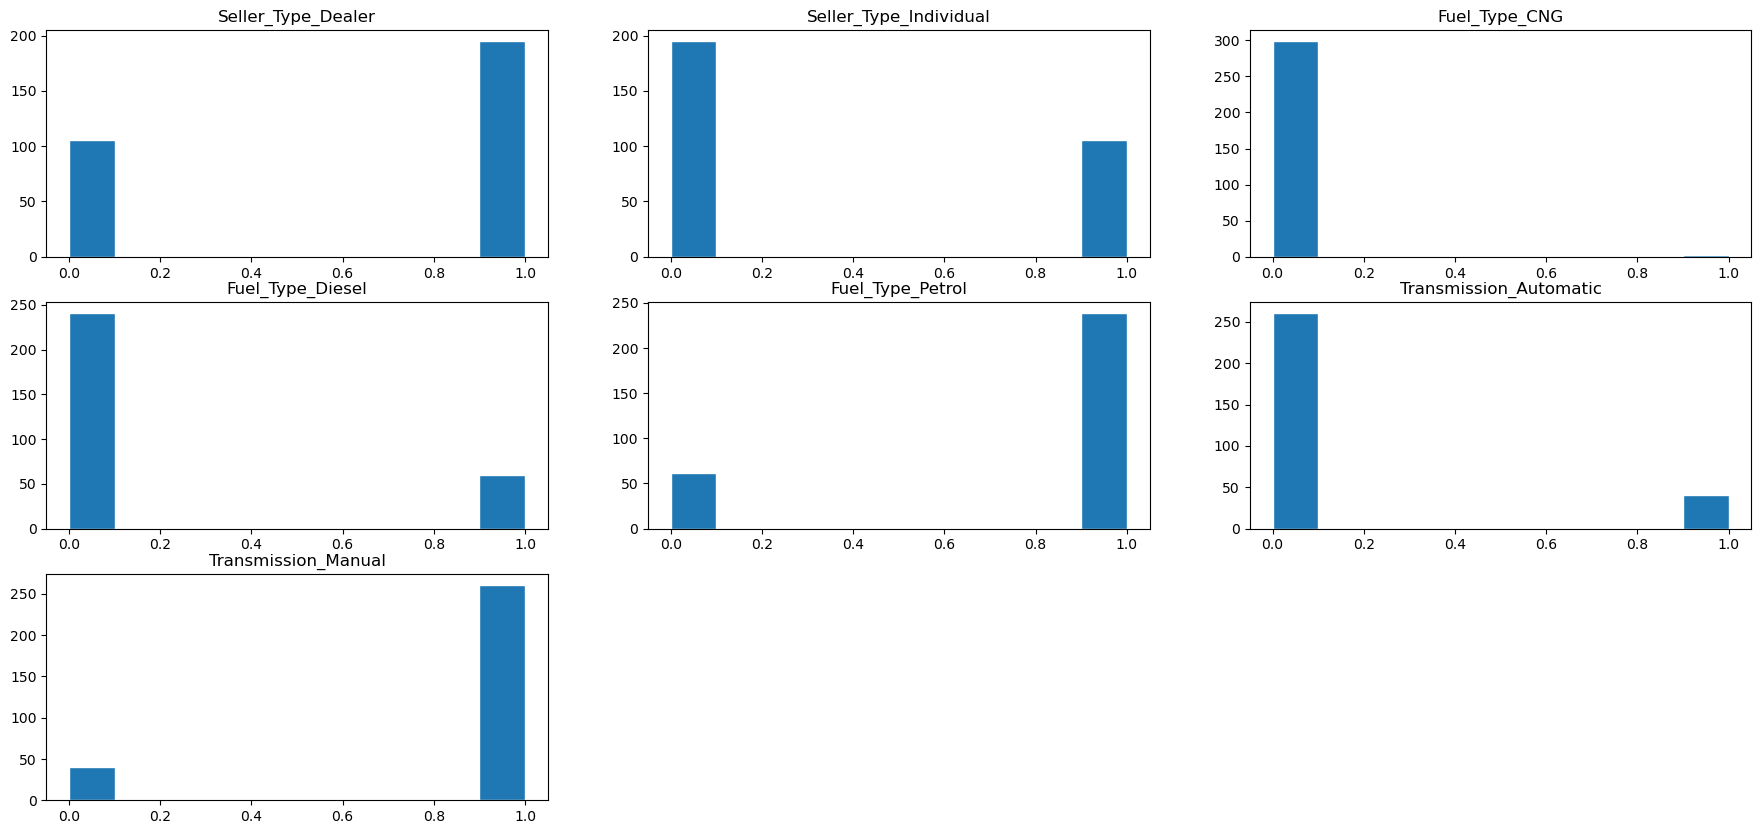

In [171]:
cols = []
for column in X_cat_encoded.columns :
    cols.append(column)

plt.figure(figsize=(22, 10))
for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)  
    plt.hist(X_cat_encoded[col], bins=10, edgecolor='white')
    plt.title(col)

plt.show()

## Normalisation

Nous avons des outliers, utiliser RobustScaler semble le plus adapté dans ce dataset puisque la normalisation min max ou la standardisation risque compresser les valeurs. RobustScaler est beaucoup moins sensible puisqu’il utilise la médianne.

La normalisation sert pour les données numériques (continues).

![continued_features](screenshots/continued_features.png "continued_features")


Après nettoyage.

In [172]:
from sklearn.preprocessing import RobustScaler

C:\Users\agobbe\AppData\Local\Temp\ipykernel_1700\2675693941.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


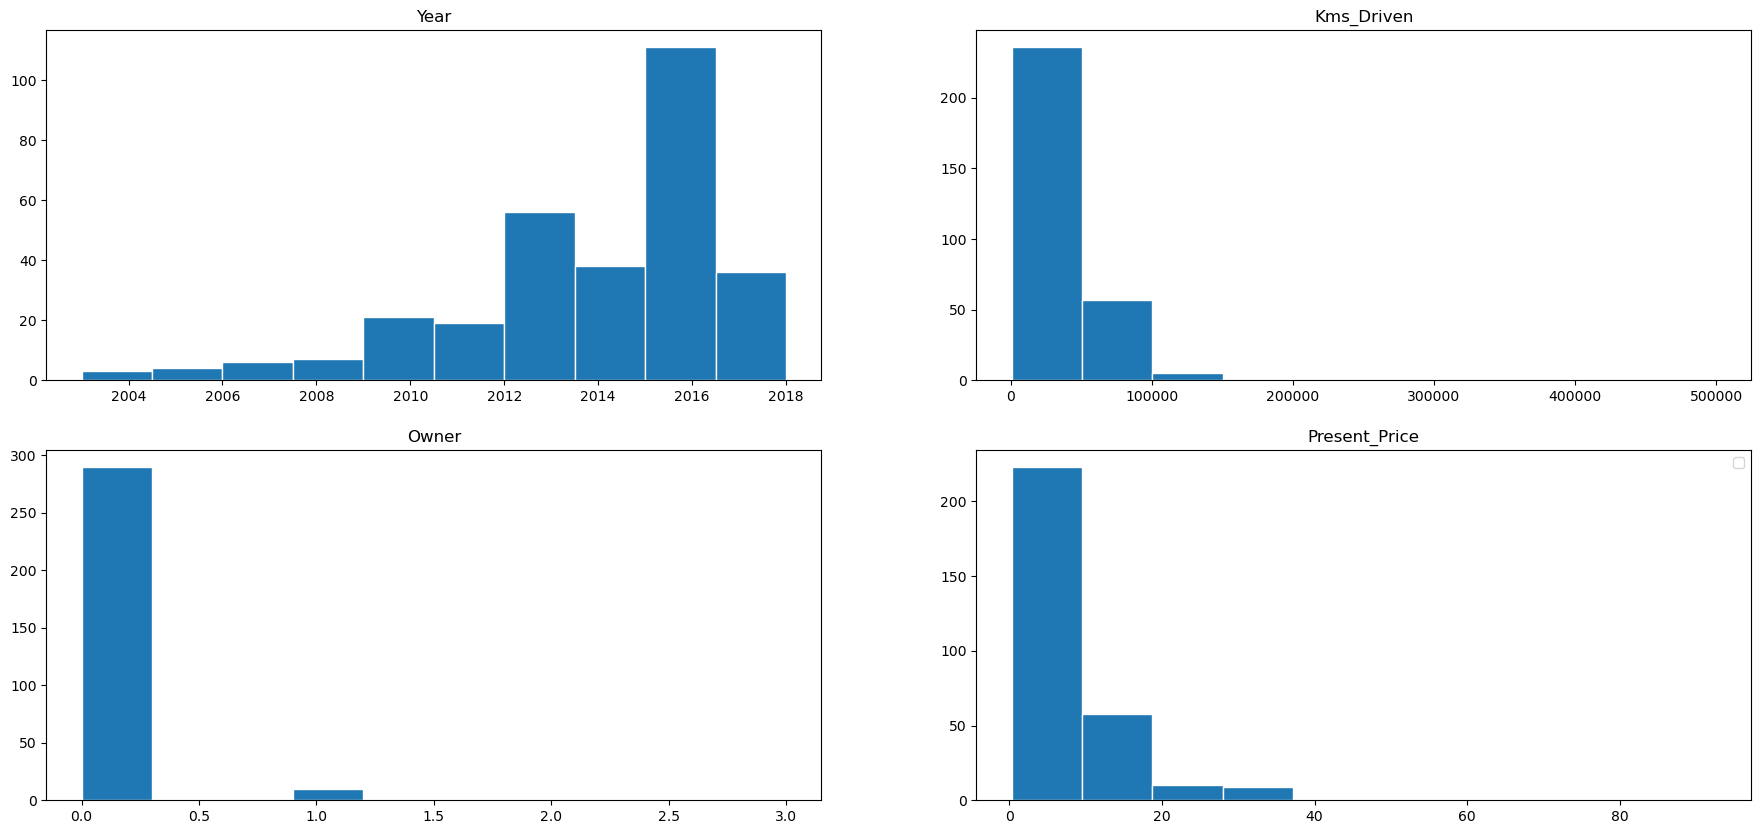

In [173]:
X_num = df[['Year', 'Kms_Driven', 'Owner', 'Present_Price']]
scaler = RobustScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns)

plt.figure(figsize=(22, 10))
cols = ['Year','Kms_Driven','Owner', 'Present_Price']
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)  
    plt.hist(X_num[col], bins=10, edgecolor='white')
    plt.title(col)
plt.legend()
plt.show()

## Merge Dataframe

In [177]:
X = pd.concat([X_cat_encoded, X_num_scaled], axis=1)
print(X.shape, y.shape)

(301, 11) (301, 1)


## Test Machine learning

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 11), (61, 11), (240, 1), (61, 1))

In [182]:
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
multi_model.score(X_train, y_train)
multi_predictions = multi_model.predict(X_test)

0.8734200741252952

In [183]:
r2 = r2_score(y_test, multi_predictions)
mae = mean_absolute_error(y_test, multi_predictions)
mse = mean_squared_error(y_test, multi_predictions)
rmse = np.sqrt(mse)
print(r2, mae, mse, rmse)

0.9144342972228514 0.9937753386730483 2.1628715277876043 1.4706704347975463


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_num_scaled['Year'].values.reshape(-1,1), df['Selling_Price'].values.reshape(-1,1), test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 1), (61, 1), (240, 1), (61, 1))

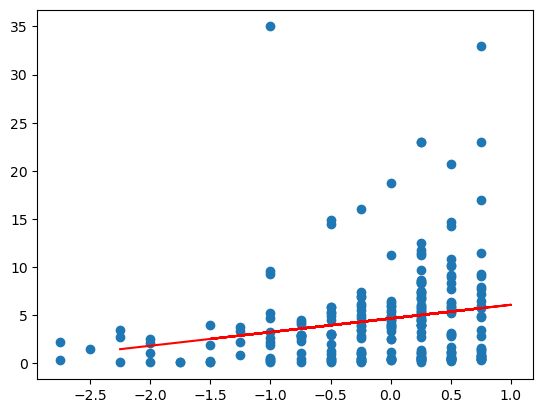

In [188]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
predictions = model.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_test, predictions, color='r')

## Conclusion

Même en ayant suivi "les bonnes pratiques du machine learning" (Processing), le résultat reste le même que si nous n’avions pas effectué de transformations de données.

La tendance reste la même, car la régression linéaire cherche juste à ajuster une droite au nuage de points, peu importe le traitement de donnée.

Les résultats observés sont quasi identiques à notre première analyse.